## Jupyter notebook example for using scatterutils

In [1]:
import os
import glob
import psrchive
import numpy as np
import scatterutils_lofar as scat
import matplotlib.pyplot as plt

def get_pulseperiod(archive):
    ephem = archive.get_ephemeris()
    rot_freq = ephem.get_value('F0')
    pulseperiod = 1.0/float(rot_freq)
    return pulseperiod

# Method 1 -- turn archive into ascii

## Turn archive file into ascii with chosen number of frrequency channels

In [7]:
!ls *.ar

J1341-6220_2019-04-03-00:42:08_zap.16ch64s.ar
J1630-4733_2019-03-15-04:19:52_zap.16ch64s.ar


In [20]:
#arfile = 'J1341-6220_2019-04-03-00:42:08_zap.16ch64s.ar'
arfile = 'J1630-4733_2019-03-15-04:19:52_zap.16ch64s.ar'
asciifile = scat.archive_to_ascii(arfile,nchan=8,verbose=True)

Archive has been dedispersed, t-scrunched and p-scrunched
J1630-4733_2019-03-15-04:19:52_zap.16ch64s.ar.DTp8ch written to disk

Ascii saved as J1630-4733_2019-03-15-04:19:52_zap.16ch64s.ar.DTp8ch.ascii


In [15]:
asciifile

'J1630-4733_2019-03-15-04:19:52_zap.16ch64s.ar.DTp8ch.ascii'

## Obtain or hard-code pulse period

In [17]:
## Header of ascii file does not contain pulse period
arch = psrchive.Archive_load(arfile)
per = get_pulseperiod(arch)
print per

0.575971411552


## Run scattering fits  -- standard isotropic scattering model

Pulsar name: J1630-4733
Number of freq. channels: 8 
Freq channels will be labeled 0 - 7
Number of bins: 1024
RMS from ascii header: 0.000390
Tsub: 504.00 sec
--------------------------------------------------------
--------------------------------------------------------
Channel 0
peak bin at lowest freq channel:64
Rolling data by -448 bins
[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 95
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.3608e-04
    reduced chi-square = 1.3355e-07
    Akaike info crit   = -16203.7244
    Bayesian info crit = -16179.0671
[[Variables]]
    mu:     433.209466 +/- 3.45459649 (0.80%) (init = 512)
    sigma:  47.9499650 +/- 3.56203532 (7.43%) (init = 15)
    A:      0.03134529 +/- 0.01123523 (35.84%) (init = 0.00237688)
    tau:    1034.31820 +/- 230.616822 (22.30%) (init = 200)
    dc:    -1.0936e-04 +/- 2.7729e-05 (25.36%) (init = 0)
    nbins:  1024 (fixed)
[[

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 1024
    # variables        = 5
    chi-square         = 7.7575e-06
    reduced chi-square = 7.6128e-09
    Akaike info crit   = -19137.0867
    Bayesian info crit = -19112.4294
[[Variables]]
    mu:     368.850956 +/- 0.22723827 (0.06%) (init = 396)
    sigma:  16.7066166 +/- 0.26458878 (1.58%) (init = 15)
    A:      0.00798692 +/- 1.3499e-04 (1.69%) (init = 0.00313192)
    tau:    71.8909220 +/- 0.77612944 (1.08%) (init = 200)
    dc:     7.0749e-06 +/- 3.3574e-06 (47.45%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.935
    C(A, tau)     =  0.644
    C(mu, tau)    = -0.629
    C(sigma, tau) = -0.430
    C(mu, A)      = -0.405
    C(tau, dc)    = -0.400
    C(mu, sigma)  =  0.271
    C(mu, dc)     =  0.252
    C(A, dc)      = -0.207

Estimated SNR (from model peak and data rms): 43.

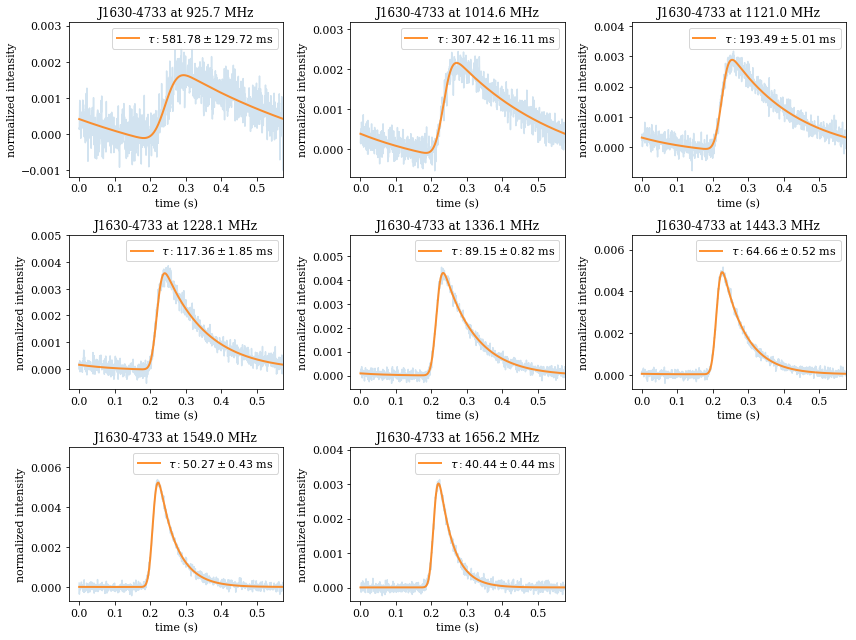

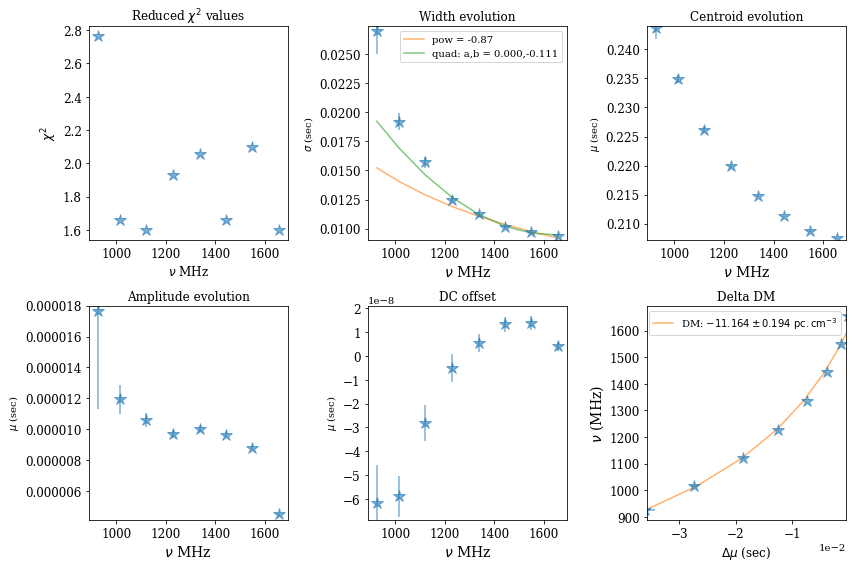

[[Variables]]
    exponent:  -3.59464246 +/- 0.09067345 (2.52%) (init = -4.480342)
    amplitude:  0.24432302 +/- 0.00936996 (3.84%) (init = 0.3435969)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.988

Plotting fitted tau-spectrum

[[Variables]]
    exponent:  -3.59464246 +/- 0.09067345 (2.52%) (init = -4.480342)
    amplitude:  0.24432302 +/- 0.00936996 (3.84%) (init = 0.3435969)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.988


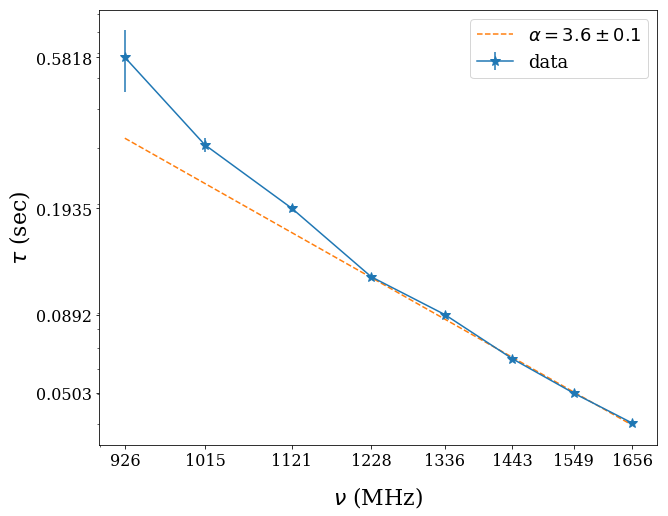

In [18]:
freqMHz, taussec, taustdssec =  scat.produce_taufits(asciifile, meth='iso', pulseperiod=per, snr_cut=5.0, verbose=True, plotparams=True,savefigure=False)
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum_noplot(freqMHz, taussec, taustdssec)

## or with plot
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum(freqMHz, taussec, taustdssec)

## Run scattering fits -- one dimensional extremely anisotropic scattering model

Pulsar name: J1630-4733
Number of freq. channels: 8 
Freq channels will be labeled 0 - 7
Number of bins: 1024
RMS from ascii header: 0.000390
Tsub: 504.00 sec
--------------------------------------------------------
--------------------------------------------------------
Channel 0
peak bin at lowest freq channel:64
Rolling data by -448 bins
[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 120
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.6400e-04
    reduced chi-square = 1.6095e-07
    Akaike info crit   = -16012.6168
    Bayesian info crit = -15987.9594
[[Variables]]
    mu:     521.079740 +/- 14.6110946 (2.80%) (init = 512)
    sigma:  105.875695 +/- 13.9595643 (13.18%) (init = 15)
    A:      0.00426872 +/- 0.01494884 (350.19%) (init = 0.00237688)
    tau1:   1507.50667 +/- 21641.0200 (1435.55%) (init = 200)
    dc:     9.5422e-05 +/- 2.9423e-05 (30.83%) (init = 0)
    nbins:  1024 (fi

Channel 0
Tau (ms): 847.93
tau1GHz_alpha_4 (ms) ~ 622.5122
Channel 1
Tau (ms): 820.55
tau1GHz_alpha_4 (ms) ~ 869.5192
Channel 2
Tau (ms): 769.20
tau1GHz_alpha_4 (ms) ~ 1214.7958
Channel 3
Tau (ms): 648.64
tau1GHz_alpha_4 (ms) ~ 1475.4897
Channel 4
Tau (ms): 398.03
tau1GHz_alpha_4 (ms) ~ 1268.3275
Channel 5
Tau (ms): 178.48
tau1GHz_alpha_4 (ms) ~ 774.5377
Channel 6
Tau (ms): 114.66
tau1GHz_alpha_4 (ms) ~ 660.0342
Channel 7
Tau (ms): 83.49
tau1GHz_alpha_4 (ms) ~ 628.1474

Plotting Gaussian fit parameters w.r.t frequency



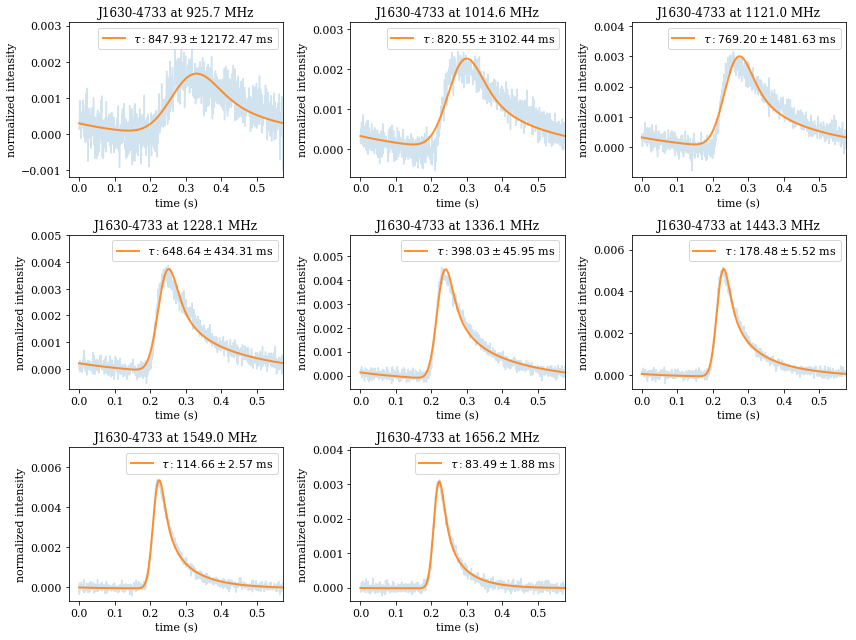

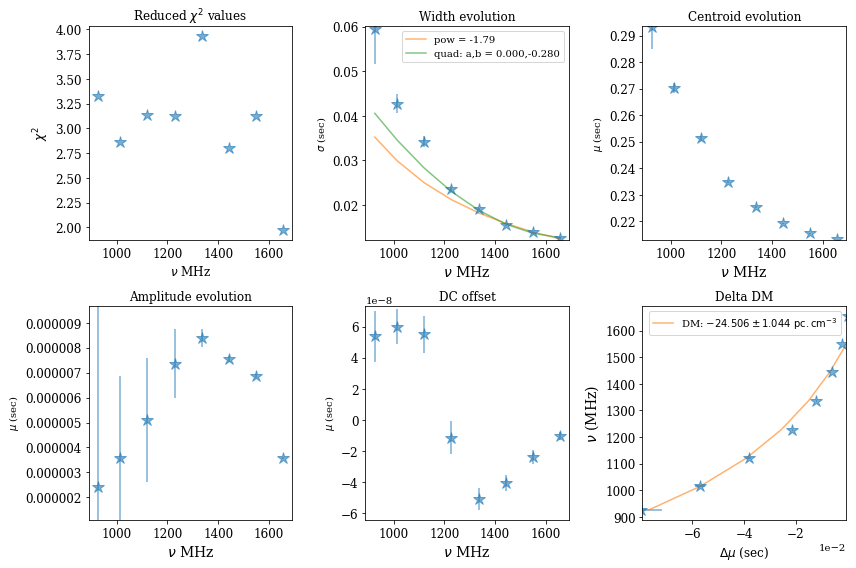

[[Variables]]
    exponent:  -5.02727203 +/- 0.18229292 (3.63%) (init = -4.301591)
    amplitude:  1.05022179 +/- 0.09153843 (8.72%) (init = 0.9549454)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.997

Plotting fitted tau-spectrum

[[Variables]]
    exponent:  -5.02727203 +/- 0.18229292 (3.63%) (init = -4.301591)
    amplitude:  1.05022179 +/- 0.09153843 (8.72%) (init = 0.9549454)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.997


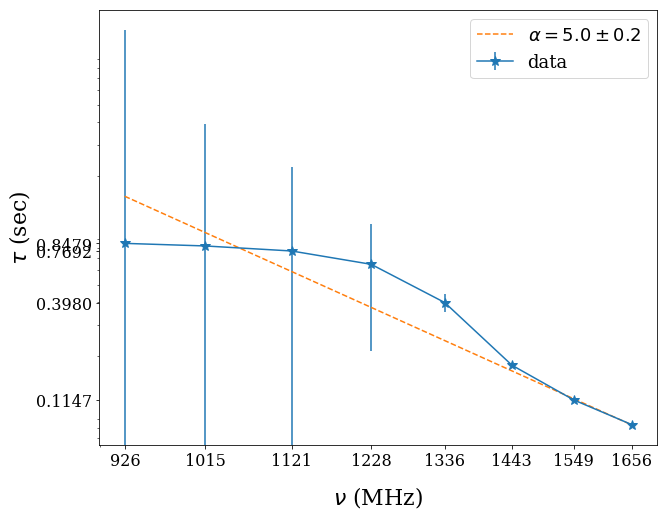

In [21]:
freqMHz, taussec, taustdssec =  scat.produce_taufits(asciifile, meth='onedim', pulseperiod=per, snr_cut=5.0, verbose=True, plotparams=True,savefigure=False)
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum_noplot(freqMHz, taussec, taustdssec)

## or with plot
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum(freqMHz, taussec, taustdssec)

# Method 2 - use get_data in psrchive

In [22]:
## Load dedispersed, t-scrunched, p-scrunched archive with 8 channels
arch = psrchive.Archive_load(arfile)
arch.remove_baseline()
arch.dedisperse()
arch.pscrunch()
arch.tscrunch()
arch.fscrunch_to_nchan(8)
data = arch.get_data()
nbins = arch.get_nbin()
nchan = arch.get_nchan()
print nchan, nbins

per = get_pulseperiod(arch)

data = data.reshape(nchan,nbins)
print np.shape(data)

8 1024
(8, 1024)


## Fit using isotropic scattering model

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 145
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.6096e-04
    reduced chi-square = 1.5796e-07
    Akaike info crit   = -16031.8198
    Bayesian info crit = -16007.1625
[[Variables]]
    mu:     89.0311268 +/- 19.1965116 (21.56%) (init = 64)
    sigma:  261.119192 +/- 17.3418197 (6.64%) (init = 15)
    A:      0.00179096 +/- 2.0796e-04 (11.61%) (init = 0.002375015)
    tau:    2.03759229 +/- 0.90773219 (44.55%) (init = 200)
    dc:     1.1062e-04 +/- 2.5598e-05 (23.14%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau)     = -0.972
    C(mu, sigma)  = -0.846
    C(sigma, dc)  = -0.590
    C(mu, dc)     =  0.290
    C(mu, tau)    = -0.286
    C(sigma, tau) =  0.169
    C(mu, A)      =  0.168
    C(A, dc)      = -0.136

0.0011460887788593687 0.0005105740162449352


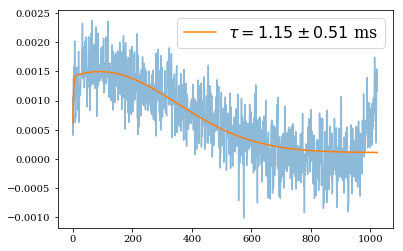

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 922
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.4732e-04
    reduced chi-square = 1.4457e-07
    Akaike info crit   = -16122.4697
    Bayesian info crit = -16097.8124
[[Variables]]
    mu:     6.5784e-07 +/- 0.85019886 (129240260.85%) (init = 41)
    sigma:  1.29701877 +/- 3.24572698 (250.25%) (init = 15)
    A:      0.70414331 +/- 2.81129076 (399.25%) (init = 0.002434412)
    tau:    327.437314 +/- 19.1597722 (5.85%) (init = 200)
    dc:     1.4760e-04 +/- 2.4898e-05 (16.87%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, A)     = -0.995
    C(mu, sigma) = -0.995
    C(sigma, A)  =  0.980
    C(tau, dc)   = -0.731

0.18417434774816893 0.010776836948389299


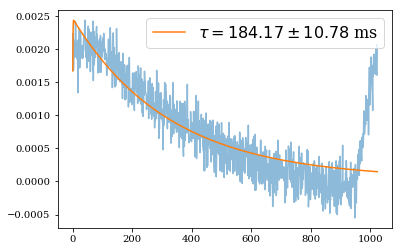

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 642
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.0202e-04
    reduced chi-square = 2.9639e-07
    Akaike info crit   = -15387.3536
    Bayesian info crit = -15362.6962
[[Variables]]
    mu:     1.3626e-05 +/- 17.5291996 (128644749.01%) (init = 11)
    sigma:  0.98079590 +/- 7.45958636 (760.56%) (init = 15)
    A:      0.82267793 +/- 14.0788893 (1711.35%) (init = 0.00316187)
    tau:    203.448119 +/- 11.4819608 (5.64%) (init = 200)
    dc:     3.5504e-04 +/- 2.9270e-05 (8.24%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, A)     =  0.999
    C(mu, sigma) =  0.999
    C(sigma, A)  =  0.997
    C(tau, dc)   = -0.676

0.11443388705095194 0.006458282364787979


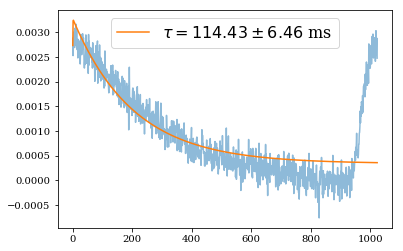

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 107
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.4822e-05
    reduced chi-square = 3.4172e-08
    Akaike info crit   = -17599.4616
    Bayesian info crit = -17574.8042
[[Variables]]
    mu:     966.975022 +/- 0.48934724 (0.05%) (init = 1022)
    sigma:  22.1675217 +/- 0.60727612 (2.74%) (init = 15)
    A:      0.01739382 +/- 5.0687e-04 (2.91%) (init = 0.0038568)
    tau:    209.887632 +/- 3.26104146 (1.55%) (init = 200)
    dc:    -1.0429e-05 +/- 1.0504e-05 (100.73%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.896
    C(tau, dc)    = -0.672
    C(mu, tau)    = -0.562
    C(A, tau)     =  0.555
    C(mu, A)      = -0.373
    C(mu, dc)     =  0.369
    C(A, dc)      = -0.341
    C(mu, sigma)  =  0.182
    C(sigma, tau) = -0.180

0.11805593338709908 0.0018342447773622697


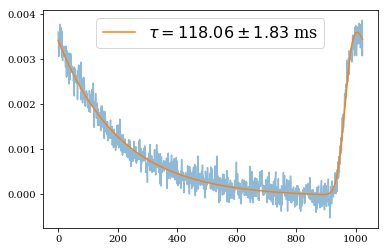

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 119
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.7917e-05
    reduced chi-square = 1.7583e-08
    Akaike info crit   = -18279.8752
    Bayesian info crit = -18255.2179
[[Variables]]
    mu:     957.840615 +/- 0.26877526 (0.03%) (init = 982)
    sigma:  19.9656475 +/- 0.32702550 (1.64%) (init = 15)
    A:      0.01780045 +/- 3.1430e-04 (1.77%) (init = 0.004525836)
    tau:    158.584614 +/- 1.45809737 (0.92%) (init = 200)
    dc:     9.2854e-06 +/- 6.7014e-06 (72.17%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.922
    C(tau, dc)    = -0.618
    C(A, tau)     =  0.563
    C(mu, tau)    = -0.559
    C(mu, dc)     =  0.344
    C(mu, A)      = -0.322
    C(A, dc)      = -0.292
    C(sigma, tau) = -0.263
    C(mu, sigma)  =  0.156

0.08919941814116036 0.0008201390630270741


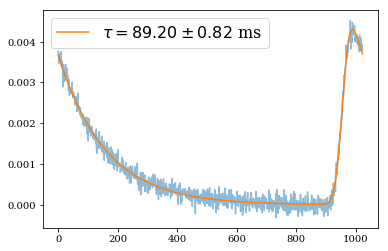

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.6218e-05
    reduced chi-square = 1.5915e-08
    Akaike info crit   = -18381.9352
    Bayesian info crit = -18357.2779
[[Variables]]
    mu:     951.618632 +/- 0.20870107 (0.02%) (init = 983)
    sigma:  18.0032280 +/- 0.25247646 (1.40%) (init = 15)
    A:      0.01717327 +/- 2.5735e-04 (1.50%) (init = 0.00516033)
    tau:    114.962975 +/- 0.92460435 (0.80%) (init = 200)
    dc:     2.3660e-05 +/- 5.5740e-06 (23.56%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.935
    C(A, tau)     =  0.581
    C(mu, tau)    = -0.569
    C(tau, dc)    = -0.532
    C(sigma, tau) = -0.332
    C(mu, A)      = -0.331
    C(mu, dc)     =  0.303
    C(A, dc)      = -0.248
    C(mu, sigma)  =  0.189

0.06466346385126931 0.000520064132980371


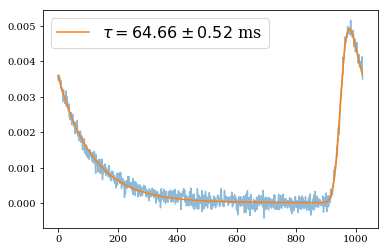

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.7290e-05
    reduced chi-square = 1.6968e-08
    Akaike info crit   = -18316.3779
    Bayesian info crit = -18291.7206
[[Variables]]
    mu:     947.129109 +/- 0.19834216 (0.02%) (init = 968)
    sigma:  17.2781067 +/- 0.23603351 (1.37%) (init = 15)
    A:      0.01566054 +/- 2.2821e-04 (1.46%) (init = 0.0053775)
    tau:    89.3783048 +/- 0.75882992 (0.85%) (init = 200)
    dc:     2.4016e-05 +/- 5.2936e-06 (22.04%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.936
    C(A, tau)     =  0.612
    C(mu, tau)    = -0.597
    C(tau, dc)    = -0.459
    C(sigma, tau) = -0.385
    C(mu, A)      = -0.366
    C(mu, dc)     =  0.274
    C(mu, sigma)  =  0.230
    C(A, dc)      = -0.224

0.05027280112285183 0.00042682064486913445


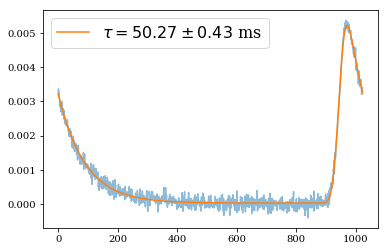

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 1024
    # variables        = 5
    chi-square         = 7.7571e-06
    reduced chi-square = 7.6125e-09
    Akaike info crit   = -19137.1287
    Bayesian info crit = -19112.4713
[[Variables]]
    mu:     944.851211 +/- 0.22720802 (0.02%) (init = 972)
    sigma:  16.7062596 +/- 0.26456491 (1.58%) (init = 15)
    A:      0.00798732 +/- 1.3499e-04 (1.69%) (init = 0.003131806)
    tau:    71.8900265 +/- 0.77603477 (1.08%) (init = 200)
    dc:     6.9022e-06 +/- 3.3573e-06 (48.64%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.935
    C(A, tau)     =  0.644
    C(mu, tau)    = -0.629
    C(sigma, tau) = -0.430
    C(mu, A)      = -0.405
    C(tau, dc)    = -0.400
    C(mu, sigma)  =  0.271
    C(mu, dc)     =  0.252
    C(A, dc)      = -0.207

0.04043613284679397 0.000436497891740392


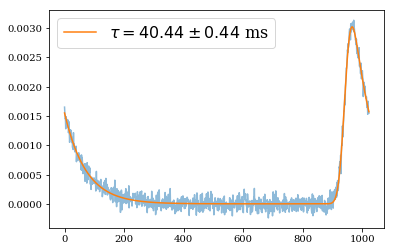

In [23]:
## parameter units are in bins

for i in range(nchan):
    result, noiselessmodel, besttau, taustd, bestparams, bestparams_std, rchi, corsig = scat.tau_fitter(data[i],nbins,verbose=True)
    tausec, taustdsec = besttau*per/float(nbins), taustd*per/float(nbins)
    print tausec, taustdsec
    plt.figure()
    plt.plot(data[i], alpha=0.5)
    plt.plot(noiselessmodel, label=r'$\tau = %.2f \pm %.2f$ ms' %(1000*tausec, 1000*taustdsec))
    plt.legend(fontsize=16)
    plt.show()

## Fit using anisotropic scattering model

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 1024
    # variables        = 5
    chi-square         = 7.1826e-05
    reduced chi-square = 7.0487e-08
    Akaike info crit   = -16858.0782
    Bayesian info crit = -16833.4209
[[Variables]]
    mu:     798.466069 +/- 1.63113893 (0.20%) (init = 813)
    sigma:  20.3712662 +/- 1.73363957 (8.51%) (init = 15)
    A:      0.00362325 +/- 5.5035e-04 (15.19%) (init = 0.001475415)
    tau1:   361.562955 +/- 102.281337 (28.29%) (init = 200)
    dc:    -2.1244e-05 +/- 1.5670e-05 (73.76%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau1)     =  0.870
    C(tau1, dc)    = -0.756
    C(A, dc)       = -0.662
    C(sigma, A)    = -0.551
    C(mu, tau1)    = -0.402
    C(mu, A)       = -0.350
    C(mu, dc)      =  0.304
    C(sigma, tau1) = -0.128

0.06826610349360593 0.01931156997223743


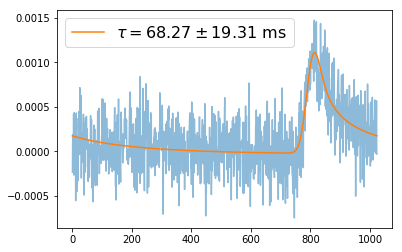

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 79
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.5535e-05
    reduced chi-square = 3.4873e-08
    Akaike info crit   = -17578.6850
    Bayesian info crit = -17554.0276
[[Variables]]
    mu:     803.673808 +/- 1.07066528 (0.13%) (init = 807)
    sigma:  25.0513760 +/- 1.10891802 (4.43%) (init = 15)
    A:      0.00307750 +/- 1.9097e-04 (6.21%) (init = 0.001738829)
    tau1:   198.918822 +/- 20.1525682 (10.13%) (init = 200)
    dc:     2.0059e-05 +/- 9.1963e-06 (45.85%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau1)     =  0.802
    C(sigma, A)    = -0.716
    C(tau1, dc)    = -0.652
    C(A, dc)       = -0.523
    C(mu, tau1)    = -0.512
    C(mu, A)       = -0.410
    C(mu, dc)      =  0.334
    C(sigma, tau1) = -0.264
    C(mu, sigma)   =  0.135

0.037557533742310606 0.0038049730678

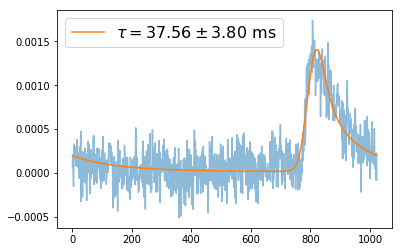

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.2720e-05
    reduced chi-square = 3.2110e-08
    Akaike info crit   = -17663.2237
    Bayesian info crit = -17638.5664
[[Variables]]
    mu:     802.658244 +/- 0.68752964 (0.09%) (init = 806)
    sigma:  19.7244172 +/- 0.72784056 (3.69%) (init = 15)
    A:      0.00419680 +/- 2.0689e-04 (4.93%) (init = 0.002111174)
    tau1:   172.807006 +/- 13.1727940 (7.62%) (init = 200)
    dc:     5.0494e-05 +/- 8.2900e-06 (16.42%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau1)     =  0.773
    C(sigma, A)    = -0.751
    C(tau1, dc)    = -0.622
    C(A, dc)       = -0.479
    C(mu, tau1)    = -0.468
    C(mu, A)       = -0.362
    C(mu, dc)      =  0.291
    C(sigma, tau1) = -0.270
    C(mu, sigma)   =  0.127

0.032627405033163394 0.00248713344969

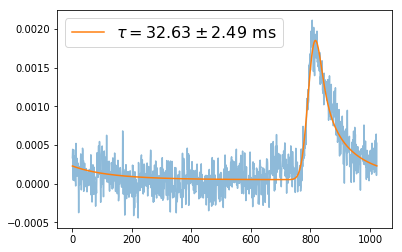

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.3710e-05
    reduced chi-square = 3.3082e-08
    Akaike info crit   = -17632.6851
    Bayesian info crit = -17608.0277
[[Variables]]
    mu:     805.556634 +/- 0.60789672 (0.08%) (init = 820)
    sigma:  15.2550210 +/- 0.63541372 (4.17%) (init = 15)
    A:      0.00335655 +/- 1.6827e-04 (5.01%) (init = 0.001949117)
    tau1:   70.8009293 +/- 5.67108028 (8.01%) (init = 200)
    dc:    -3.1859e-05 +/- 6.6616e-06 (20.91%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.833
    C(A, tau1)     =  0.755
    C(mu, tau1)    = -0.565
    C(mu, A)       = -0.426
    C(sigma, tau1) = -0.417
    C(tau1, dc)    = -0.385
    C(A, dc)       = -0.290
    C(mu, sigma)   =  0.236
    C(mu, dc)      =  0.217

0.013367806355596399 0.00107074728730

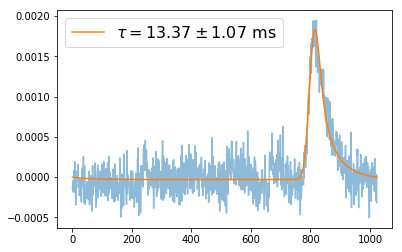

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.1065e-05
    reduced chi-square = 2.0673e-08
    Akaike info crit   = -18114.1328
    Bayesian info crit = -18089.4755
[[Variables]]
    mu:     805.736523 +/- 0.31071899 (0.04%) (init = 804)
    sigma:  11.8963711 +/- 0.33571674 (2.82%) (init = 15)
    A:      0.00516958 +/- 1.7571e-04 (3.40%) (init = 0.002492478)
    tau1:   79.3220454 +/- 3.91078262 (4.93%) (init = 200)
    dc:     5.1306e-05 +/- 5.3095e-06 (10.35%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.833
    C(A, tau1)     =  0.727
    C(mu, tau1)    = -0.477
    C(tau1, dc)    = -0.413
    C(sigma, tau1) = -0.359
    C(mu, A)       = -0.347
    C(A, dc)       = -0.297
    C(mu, dc)      =  0.197
    C(mu, sigma)   =  0.171

0.014976664195672907 0.00073838839722

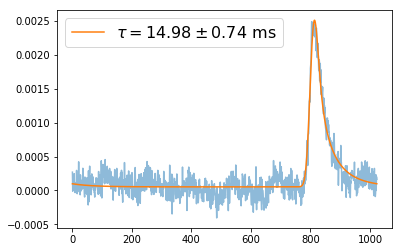

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.9363e-05
    reduced chi-square = 1.9002e-08
    Akaike info crit   = -18200.4095
    Bayesian info crit = -18175.7522
[[Variables]]
    mu:     807.167350 +/- 0.27671080 (0.03%) (init = 809)
    sigma:  11.2697890 +/- 0.28831837 (2.56%) (init = 15)
    A:      0.00466848 +/- 1.4075e-04 (3.01%) (init = 0.002861234)
    tau1:   46.1984109 +/- 2.24823047 (4.87%) (init = 200)
    dc:    -5.6543e-06 +/- 4.7663e-06 (84.29%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.851
    C(A, tau1)     =  0.754
    C(mu, tau1)    = -0.589
    C(sigma, tau1) = -0.454
    C(mu, A)       = -0.444
    C(tau1, dc)    = -0.300
    C(mu, sigma)   =  0.268
    C(A, dc)       = -0.226
    C(mu, dc)      =  0.177

0.008722645546750913 0.00042448467635

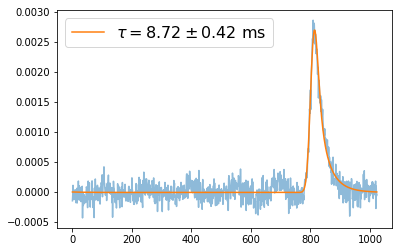

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.7807e-05
    reduced chi-square = 2.7289e-08
    Akaike info crit   = -17829.8132
    Bayesian info crit = -17805.1558
[[Variables]]
    mu:     808.420357 +/- 0.31521659 (0.04%) (init = 813)
    sigma:  10.9141363 +/- 0.31623541 (2.90%) (init = 15)
    A:      0.00459181 +/- 1.5545e-04 (3.39%) (init = 0.003154769)
    tau1:   34.0318529 +/- 2.04996149 (6.02%) (init = 200)
    dc:    -2.5251e-06 +/- 5.5855e-06 (221.20%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.858
    C(A, tau1)     =  0.775
    C(mu, tau1)    = -0.660
    C(sigma, tau1) = -0.512
    C(mu, A)       = -0.512
    C(mu, sigma)   =  0.338
    C(tau1, dc)    = -0.251
    C(A, dc)       = -0.197
    C(mu, dc)      =  0.165

0.0064254978558359295 0.000387049838

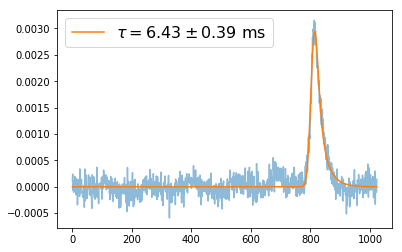

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.7925e-05
    reduced chi-square = 2.7404e-08
    Akaike info crit   = -17825.4807
    Bayesian info crit = -17800.8234
[[Variables]]
    mu:     809.539313 +/- 0.33640299 (0.04%) (init = 815)
    sigma:  10.1782854 +/- 0.32893143 (3.23%) (init = 15)
    A:      0.00410866 +/- 1.5426e-04 (3.75%) (init = 0.002899624)
    tau1:   27.4745951 +/- 1.95035349 (7.10%) (init = 200)
    dc:    -4.8237e-05 +/- 5.5258e-06 (11.46%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.863
    C(A, tau1)     =  0.787
    C(mu, tau1)    = -0.698
    C(mu, A)       = -0.549
    C(sigma, tau1) = -0.545
    C(mu, sigma)   =  0.380
    C(tau1, dc)    = -0.221
    C(A, dc)       = -0.179
    C(mu, dc)      =  0.154

0.005187432854901544 0.00036824301683

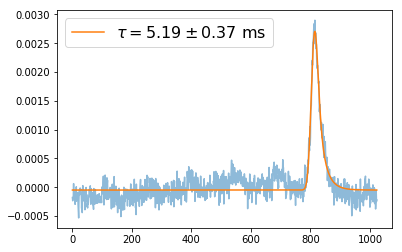

In [6]:
## parameter units are in bins

for i in range(nchan):
    result, noiselessmodel, besttau, taustd, bestparams, bestparams_std, rchi, corsig = scat.tau_1D_fitter(data[i],nbins,verbose=True)
    tausec, taustdsec = besttau*per/float(nbins), taustd*per/float(nbins)
    print tausec, taustdsec
    plt.figure()
    plt.plot(data[i], alpha=0.5)
    plt.plot(noiselessmodel, label=r'$\tau = %.2f \pm %.2f$ ms' %(1000*tausec, 1000*taustdsec))
    plt.legend(fontsize=16)
    plt.show()

## Fit using isotropic scattering model - pick your own initial guesses for Gaussian parameters

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 1024
    # variables        = 5
    chi-square         = 7.1459e-05
    reduced chi-square = 7.0126e-08
    Akaike info crit   = -16863.3288
    Bayesian info crit = -16838.6714
[[Variables]]
    mu:     787.283453 +/- 1.69545740 (0.22%) (init = 813)
    sigma:  13.0603571 +/- 2.12517834 (16.27%) (init = 10)
    A:      0.00431466 +/- 7.3886e-04 (17.12%) (init = 0.001475415)
    tau:    101.732673 +/- 8.13837247 (8.00%) (init = 150)
    dc:     8.1845e-06 +/- 1.1048e-05 (134.98%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.950
    C(A, tau)     =  0.532
    C(mu, tau)    = -0.513
    C(tau, dc)    = -0.496
    C(sigma, tau) = -0.314
    C(mu, A)      = -0.273
    C(mu, dc)     =  0.254
    C(A, dc)      = -0.206
    C(mu, sigma)  =  0.161

Order of best fit parameters are: sigma, mu, 

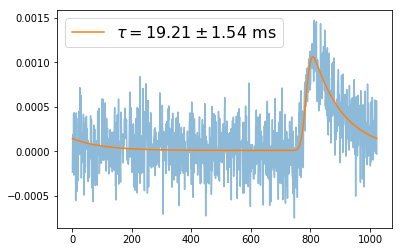

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.2482e-05
    reduced chi-square = 3.1876e-08
    Akaike info crit   = -17670.6893
    Bayesian info crit = -17646.0319
[[Variables]]
    mu:     789.287832 +/- 0.84800291 (0.11%) (init = 807)
    sigma:  12.4692031 +/- 1.06744773 (8.56%) (init = 10)
    A:      0.00582257 +/- 5.2324e-04 (8.99%) (init = 0.001738829)
    tau:    100.398089 +/- 4.12871440 (4.11%) (init = 150)
    dc:     2.9323e-05 +/- 7.4032e-06 (25.25%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.952
    C(A, tau)     =  0.525
    C(mu, tau)    = -0.504
    C(tau, dc)    = -0.492
    C(sigma, tau) = -0.310
    C(mu, A)      = -0.265
    C(mu, dc)     =  0.248
    C(A, dc)      = -0.201
    C(mu, sigma)  =  0.156

Order of best fit parameters are: sigma, mu, A, 

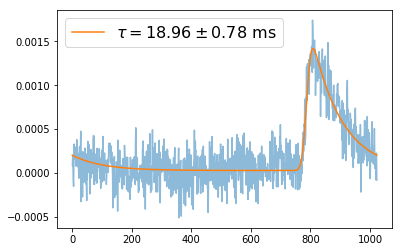

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.0981e-05
    reduced chi-square = 3.0403e-08
    Akaike info crit   = -17719.1477
    Bayesian info crit = -17694.4903
[[Variables]]
    mu:     792.429382 +/- 0.64724911 (0.08%) (init = 806)
    sigma:  12.1097591 +/- 0.80411870 (6.64%) (init = 10)
    A:      0.00632181 +/- 4.4127e-04 (6.98%) (init = 0.002111174)
    tau:    80.4471462 +/- 2.77942578 (3.45%) (init = 150)
    dc:     6.5502e-05 +/- 6.7929e-06 (10.37%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.951
    C(A, tau)     =  0.556
    C(mu, tau)    = -0.532
    C(tau, dc)    = -0.430
    C(sigma, tau) = -0.351
    C(mu, A)      = -0.296
    C(mu, dc)     =  0.229
    C(mu, sigma)  =  0.187
    C(A, dc)      = -0.185

Order of best fit parameters are: sigma, mu, A, 

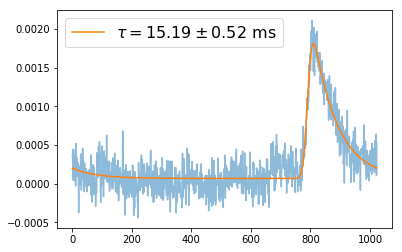

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.2358e-05
    reduced chi-square = 3.1754e-08
    Akaike info crit   = -17674.6102
    Bayesian info crit = -17649.9529
[[Variables]]
    mu:     798.687561 +/- 0.62315809 (0.08%) (init = 820)
    sigma:  11.3451482 +/- 0.71782333 (6.33%) (init = 10)
    A:      0.00448602 +/- 3.0049e-04 (6.70%) (init = 0.001949117)
    tau:    42.4279802 +/- 1.93464705 (4.56%) (init = 150)
    dc:    -2.9639e-05 +/- 6.2515e-06 (21.09%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.941
    C(A, tau)     =  0.662
    C(mu, tau)    = -0.648
    C(sigma, tau) = -0.476
    C(mu, A)      = -0.428
    C(mu, sigma)  =  0.308
    C(tau, dc)    = -0.291
    C(mu, dc)     =  0.188
    C(A, dc)      = -0.154

Order of best fit parameters are: sigma, mu, A, 

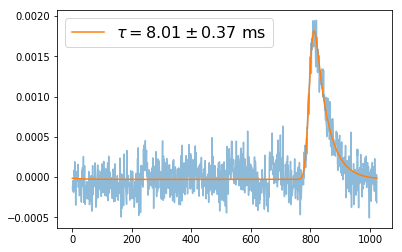

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.0586e-05
    reduced chi-square = 2.0202e-08
    Akaike info crit   = -18137.7071
    Bayesian info crit = -18113.0497
[[Variables]]
    mu:     800.573421 +/- 0.33138350 (0.04%) (init = 804)
    sigma:  8.95447512 +/- 0.39325986 (4.39%) (init = 10)
    A:      0.00647017 +/- 2.9882e-04 (4.62%) (init = 0.002492478)
    tau:    38.7485742 +/- 1.10254686 (2.85%) (init = 150)
    dc:     6.1846e-05 +/- 4.9153e-06 (7.95%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.947
    C(A, tau)     =  0.630
    C(mu, tau)    = -0.610
    C(sigma, tau) = -0.450
    C(mu, A)      = -0.384
    C(tau, dc)    = -0.277
    C(mu, sigma)  =  0.274
    C(mu, dc)     =  0.169
    C(A, dc)      = -0.137

Order of best fit parameters are: sigma, mu, A, d

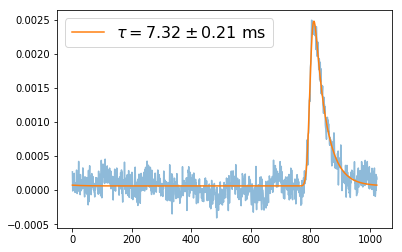

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.8509e-05
    reduced chi-square = 1.8164e-08
    Akaike info crit   = -18246.6143
    Bayesian info crit = -18221.9569
[[Variables]]
    mu:     802.955795 +/- 0.30163858 (0.04%) (init = 809)
    sigma:  9.21017101 +/- 0.33243115 (3.61%) (init = 10)
    A:      0.00567233 +/- 2.1650e-04 (3.82%) (init = 0.002861234)
    tau:    27.4128965 +/- 0.82979415 (3.03%) (init = 150)
    dc:    -2.4309e-06 +/- 4.5430e-06 (186.89%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.938
    C(A, tau)     =  0.700
    C(mu, tau)    = -0.698
    C(sigma, tau) = -0.530
    C(mu, A)      = -0.489
    C(mu, sigma)  =  0.370
    C(tau, dc)    = -0.225
    C(mu, dc)     =  0.157
    C(A, dc)      = -0.130

Order of best fit parameters are: sigma, mu, A,

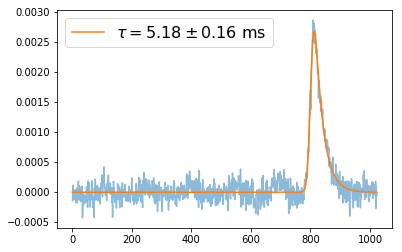

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.7210e-05
    reduced chi-square = 2.6702e-08
    Akaike info crit   = -17852.0478
    Bayesian info crit = -17827.3904
[[Variables]]
    mu:     804.893748 +/- 0.35686360 (0.04%) (init = 813)
    sigma:  9.35408068 +/- 0.36703102 (3.92%) (init = 10)
    A:      0.00539232 +/- 2.2371e-04 (4.15%) (init = 0.003154769)
    tau:    21.5872859 +/- 0.86496358 (4.01%) (init = 150)
    dc:    -4.8187e-07 +/- 5.4395e-06 (1128.84%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.932
    C(mu, tau)    = -0.758
    C(A, tau)     =  0.744
    C(sigma, tau) = -0.588
    C(mu, A)      = -0.565
    C(mu, sigma)  =  0.446
    C(tau, dc)    = -0.194
    C(mu, dc)     =  0.147
    C(A, dc)      = -0.125

Order of best fit parameters are: sigma, mu, A

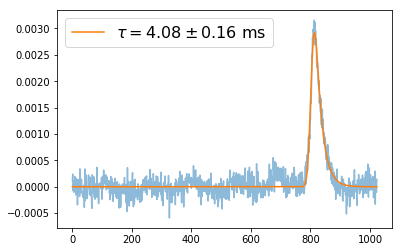

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.7602e-05
    reduced chi-square = 2.7088e-08
    Akaike info crit   = -17837.3779
    Bayesian info crit = -17812.7205
[[Variables]]
    mu:     806.474333 +/- 0.38818151 (0.05%) (init = 815)
    sigma:  8.93898331 +/- 0.38328164 (4.29%) (init = 10)
    A:      0.00475639 +/- 2.1497e-04 (4.52%) (init = 0.002899624)
    tau:    18.1184477 +/- 0.88313877 (4.87%) (init = 150)
    dc:    -4.7101e-05 +/- 5.4332e-06 (11.54%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.930
    C(mu, tau)    = -0.788
    C(A, tau)     =  0.764
    C(sigma, tau) = -0.618
    C(mu, A)      = -0.602
    C(mu, sigma)  =  0.487
    C(tau, dc)    = -0.175
    C(mu, dc)     =  0.138
    C(A, dc)      = -0.118

Order of best fit parameters are: sigma, mu, A, 

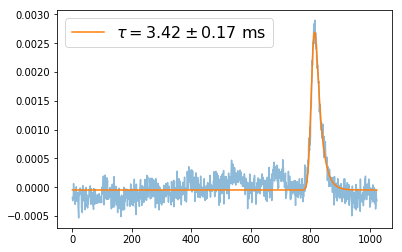

In [7]:
## parameter units are in bins
## Add your own initial guesses

for i in range(nchan):
    mu_guess = np.argmax(data[i])
    result, noiselessmodel, besttau, taustd, bestparams, bestparams_std, rchi, corsig = scat.tau_fitter_guess(data[i],nbins,mu_guess=mu_guess, sigma_guess=10.0,tau_guess=150.0,verbose=True)
    tausec, taustdsec = besttau*per/float(nbins), taustd*per/float(nbins)
    print tausec, taustdsec
    plt.figure()
    plt.plot(data[i], alpha=0.5)
    plt.plot(noiselessmodel, label=r'$\tau = %.2f \pm %.2f$ ms' %(1000*tausec, 1000*taustdsec))
    plt.legend(fontsize=16)
    plt.show()